In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
mnist=tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


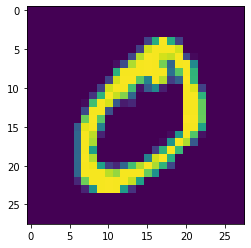

In [3]:
plt.imshow(x_train[1])

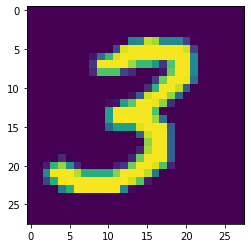

In [4]:
plt.imshow(x_train[135])

In [7]:
r,x_train = cv2.threshold(x_train,90,255,cv2.THRESH_BINARY_INV)
r2,x_test= cv2.threshold(x_test,90,255,cv2.THRESH_BINARY_INV)

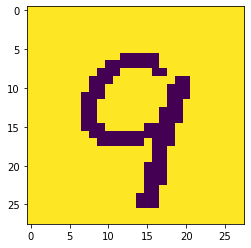

In [8]:
plt.imshow(x_test[16])

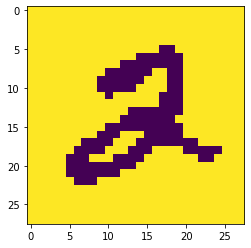

In [9]:
plt.imshow(x_train[5])

In [10]:
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)
x_train.shape

(60000, 28, 28)

In [36]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential

model=Sequential()
model.add(Conv2D(60,(3,3),activation='relu',input_shape=(28,28,1)))                   #28-3+1=26*26*60
model.add(MaxPool2D())                                                                #26/2=13*13*60
model.add(Conv2D(30,(3,3),activation='relu'))                                         #13-3+1=11*11*30
model.add(MaxPool2D())                                                                #11/2=5*5*30
model.add(Flatten())
model.add(Dense(750,activation='relu'))
model.add(Dense(750,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 26, 26, 60)        600       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 13, 13, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 11, 11, 30)        16230     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 5, 5, 30)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 750)               0         
                                                                 
 dense_29 (Dense)            (None, 750)             

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1447 - accuracy: 0.9543
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0505 - accuracy: 0.9849
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0355 - accuracy: 0.9892
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0268 - accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0217 - accuracy: 0.9933


In [38]:
val_loss, val_acc = model.evaluate(x_test, y_test)
val_loss, val_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0458 - accuracy: 0.9864


(0.04583315551280975, 0.9864000082015991)

In [39]:
prediction=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


Enter the index to be predicted:6
your img is:-
prediction is:4


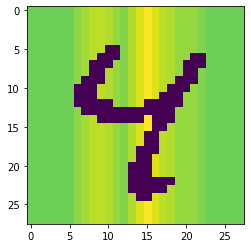

In [14]:
a=input('Enter the index to be predicted:')
A=int(a)
print('your img is:-')
plt.imshow(x_test[A])
print(f'prediction is:{np.argmax(prediction[A])}')

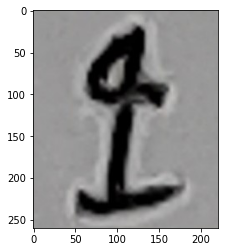

In [50]:
File=r'/content/20221116_131005.jpg'
A=plt.imread(File)
plt.imshow(A)

In [51]:
A.shape

(260, 221, 3)

In [52]:
A=cv2.resize(A,(28,28))

A=np.array(A).astype('uint8')
print(A)

[[[152 152 152]
  [151 151 151]
  [152 152 150]
  ...
  [151 151 149]
  [151 151 151]
  [152 152 152]]

 [[152 152 152]
  [153 153 153]
  [151 151 151]
  ...
  [152 152 150]
  [152 152 152]
  [151 151 151]]

 [[152 152 152]
  [151 151 151]
  [151 151 151]
  ...
  [153 153 153]
  [152 152 152]
  [152 152 152]]

 ...

 [[152 150 151]
  [153 151 152]
  [152 150 151]
  ...
  [156 156 156]
  [160 158 159]
  [155 153 154]]

 [[159 159 159]
  [152 152 152]
  [151 151 151]
  ...
  [156 156 156]
  [157 155 156]
  [155 153 154]]

 [[153 153 153]
  [150 150 150]
  [150 150 150]
  ...
  [154 154 154]
  [155 153 154]
  [154 152 153]]]


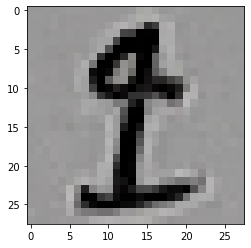

In [53]:
plt.imshow(A)

In [54]:
A=cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)

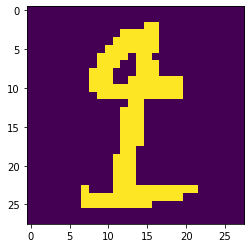

In [55]:
ret,thresh = cv2.threshold(A,100,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh)

In [56]:
A=tf.keras.utils.normalize(A, axis=1)
A=np.reshape(A, (1, 28, 28))
A.shape

(1, 28, 28)

In [57]:
Predic=model.predict(A)
np.argmax(Predic)

1/1 [==============================] - 0s 16ms/step


9